In [12]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
import matplotlib.image as mpimg
from PIL import Image
import math
from scipy.stats import norm
from numpy.random import random
import os

In [13]:
N = 500
Q = 10
R = 1
T= 1000

In [14]:
def trajectoire(T,Q):
    x_0_T = np.array([0.0 for n in range(T+1)])
    x_0_T[0]=norm.rvs(0,1)
    for i in range(1,T+1):
        xn_1=x_0_T[i-1]
        x_0_T[i]=xn_1*0.5 + 25*xn_1/(1+xn_1**2)+8*np.cos(1.2*i)+norm.rvs(0,Q)
    return x_0_T

In [15]:
def observation(T,R,x_0_T):
    y_0_T=np.array([0.0 for n in range (T+1)])
    for i in range(T+1):
        y_0_T[i]=(x_0_T[i]**2)/20+norm.rvs(0,R)
    return y_0_T

In [16]:
def poids(x,mu,sigma):
    res=1/np.sqrt(2*np.pi*sigma)
    res=res*np.exp(-0.5*((x-mu)**2)/np.sqrt(sigma))
    return res

In [17]:
def filtrage_particulaire(N,T,y_0_T):
    Particule=norm.rvs(0,1,N)
    Poids=np.ones(N)/N
    Xn=np.zeros(T+1)
    for t in range(T+1):
        propag=Particule*0.5+25*Particule/(1+Particule**2)+8*np.cos(1.2*t)+norm.rvs(0,Q,N)
        for n in range(N):
            Poids[n]=poids(y_0_T[t],(propag[n]**2)/20,R)
        tot=np.sum(Poids)
        if tot!=0:
            Poids/=tot
        else:
            Poids=np.ones(N)/N
        pick=np.random.choice(N,N,p=Poids)
        Particule=propag[pick]
        Xn[t]=np.sum(Particule*Poids)
        Poids=np.ones(N)/N
    return Xn

11.550665318342848

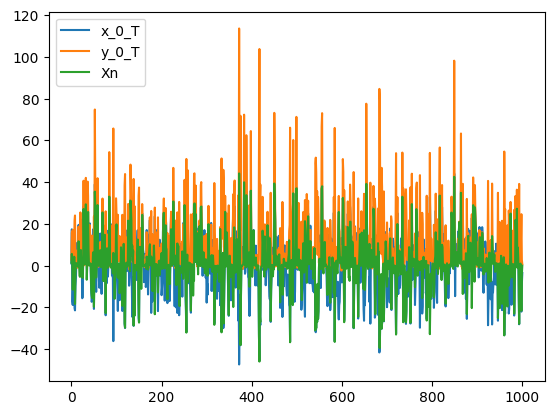

In [24]:
x_0_T=trajectoire(T,Q)
y_0_T=observation(T,R,x_0_T)
Xn=filtrage_particulaire(N,T,y_0_T)

plt.plot(x_0_T,label="x_0_T")
plt.plot(y_0_T,label="y_0_T")
plt.plot(Xn,label="Xn")
plt.legend()

plt.savefig("./N"+str(N)+"Q"+str(Q)+"R"+str(R)+"T"+str(T))
np.std(x_0_T-Xn)

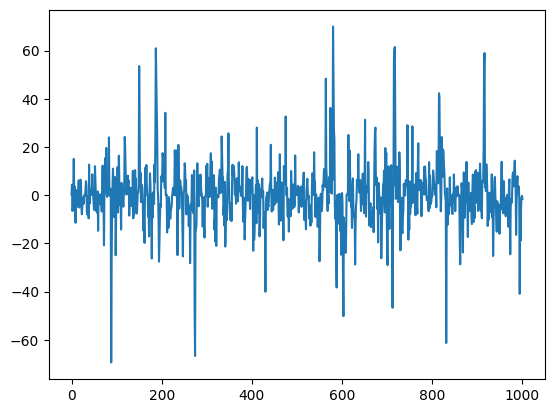

In [19]:
plt.plot(x_0_T-Xn)

12.279650165371867